In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from sklearn.preprocessing import OneHotEncoder

In [2]:
dataset=pd.read_csv("/content/abalone.csv")

In [3]:
dataset

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
df_1=dataset.loc[dataset['Rings']==7]
df_2=dataset.loc[dataset['Rings']==9]
df_3=dataset.loc[dataset['Rings']==10]

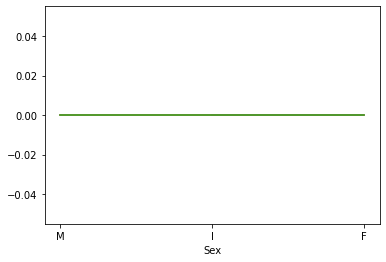

In [6]:
plt.plot(df_1['Sex'],np.zeros_like(df_1['Sex']))
plt.plot(df_2['Sex'],np.zeros_like(df_2['Sex']))
plt.plot(df_3['Sex'],np.zeros_like(df_3['Sex']))
plt.xlabel('Sex')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


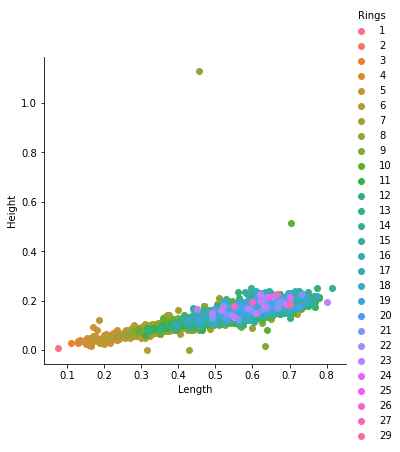

In [7]:
sns.FacetGrid(dataset,hue="Rings",size=5).map(plt.scatter,"Length","Height").add_legend();

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


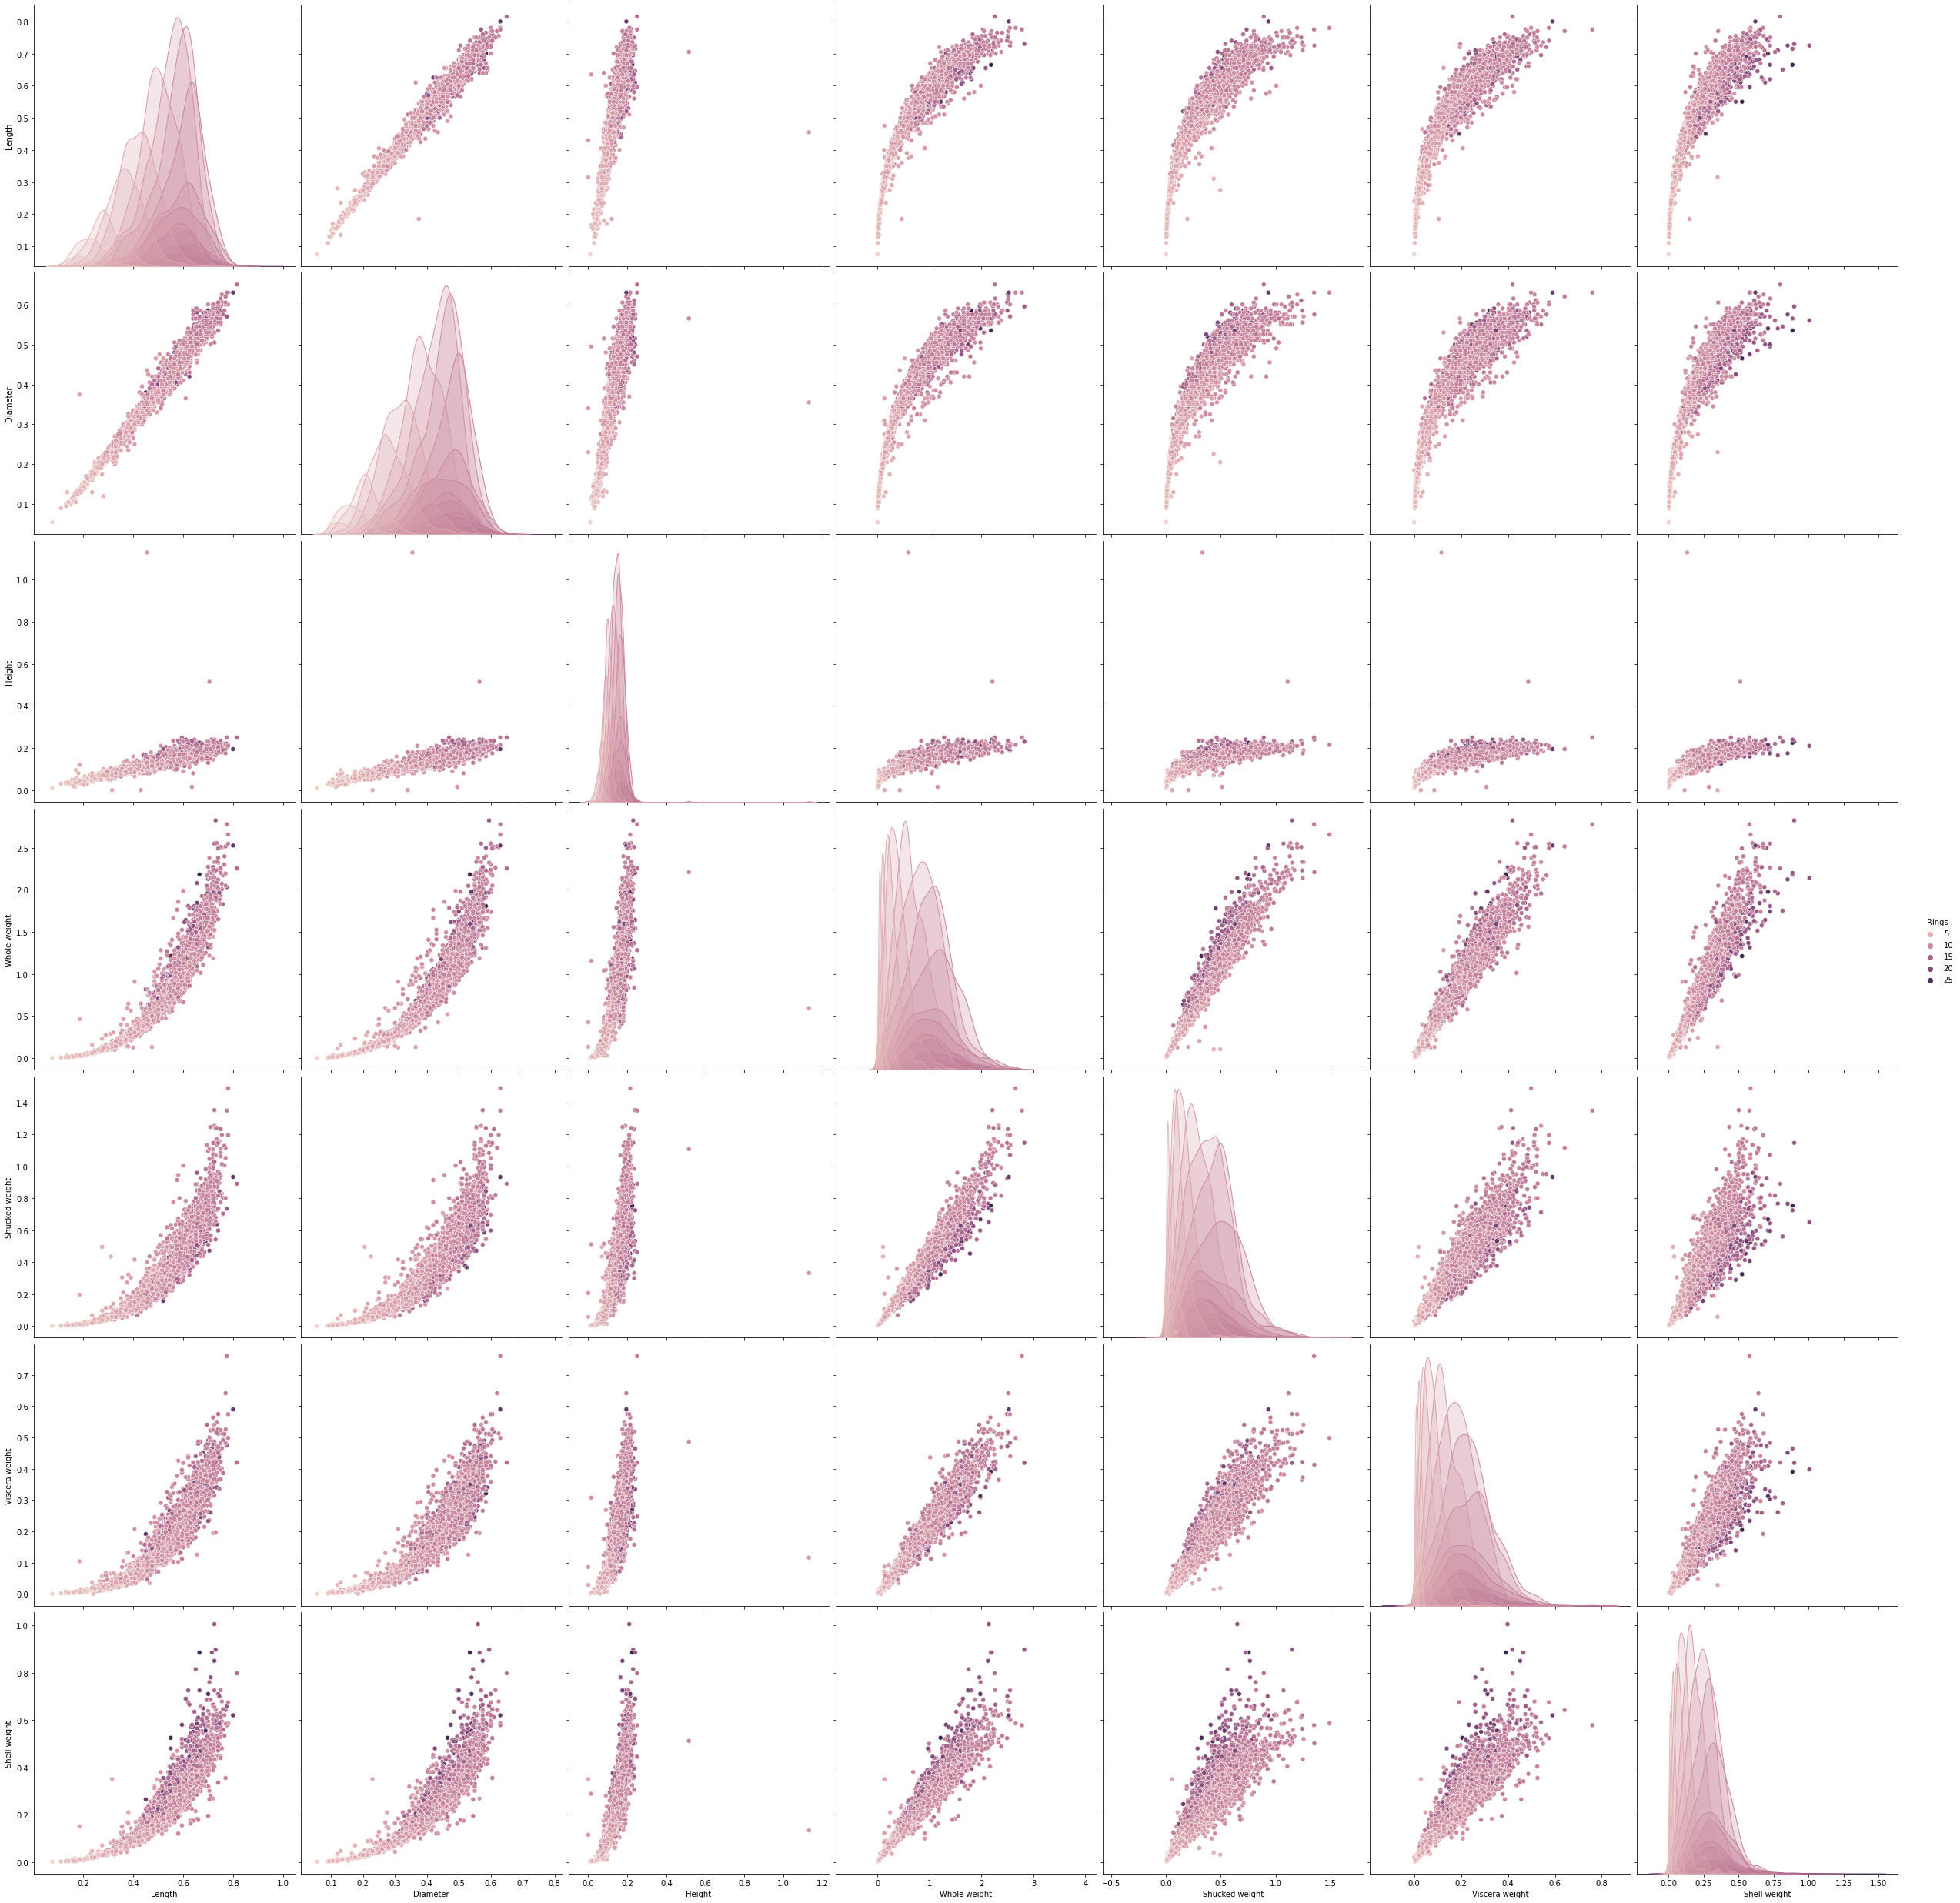

In [8]:
sns.pairplot(dataset,hue="Rings",size=5)

dataset.sum()

In [10]:
dataset.sum()

Sex               MMFMIIFFMFFMMFFMIFMMMIFFFFFMMMMFMFFMFFFMFFIIII...
Length                                                     2188.715
Diameter                                                    1703.72
Height                                                       582.76
Whole weight                                               3461.656
Shucked weight                                             1501.078
Viscera weight                                             754.3395
Shell weight                                               997.5965
Rings                                                         41493
dtype: object

In [11]:
dataset.sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


0       16.9045
1        8.1485
2       11.3700
3       11.9305
4        8.0540
         ...   
4172    13.9250
4173    13.0450
4174    12.5770
4175    13.4425
4176    17.2255
Length: 4177, dtype: float64

In [12]:
dataset.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Length            0.523992
Diameter          0.407881
Height            0.139516
Whole weight      0.828742
Shucked weight    0.359367
Viscera weight    0.180594
Shell weight      0.238831
Rings             9.933684
dtype: float64

In [13]:
dataset.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Length            0.5450
Diameter          0.4250
Height            0.1400
Whole weight      0.7995
Shucked weight    0.3360
Viscera weight    0.1710
Shell weight      0.2340
Rings             9.0000
dtype: float64

In [14]:
dataset.max()

Sex                    M
Length             0.815
Diameter            0.65
Height              1.13
Whole weight      2.8255
Shucked weight     1.488
Viscera weight      0.76
Shell weight       1.005
Rings                 29
dtype: object

In [15]:
dataset.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Length            0.120093
Diameter          0.099240
Height            0.041827
Whole weight      0.490389
Shucked weight    0.221963
Viscera weight    0.109614
Shell weight      0.139203
Rings             3.224169
dtype: float64

In [16]:
dataset.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Length             0.014422
Diameter           0.009849
Height             0.001750
Whole weight       0.240481
Shucked weight     0.049268
Viscera weight     0.012015
Shell weight       0.019377
Rings             10.395266
dtype: float64

In [17]:
Rings=dataset.Rings
Rings.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

In [18]:
dataset.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [19]:
dataset.shape

(4177, 9)

In [20]:
dataset.isnull

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4172,False,False,False,False,False,False,False,False,False
4173,False,False,False,False,False,False,False,False,False
4174,False,False,False,False,False,False,False,False,False
4175,False,False,False,False,False,False,False,False,False


In [21]:
dataset.isnull().sum()


Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [22]:
dataset.isnull().sum().sum()

0

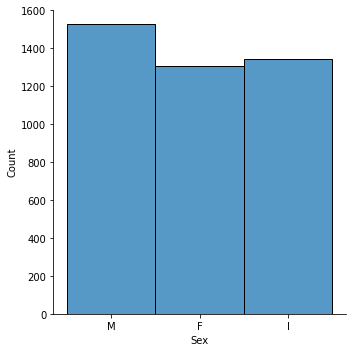

In [23]:
sns.displot(dataset['Sex'])

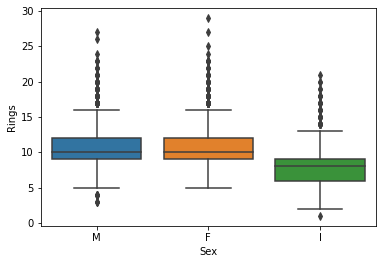

In [25]:
sns.boxplot(x='Sex',y='Rings',data=dataset)

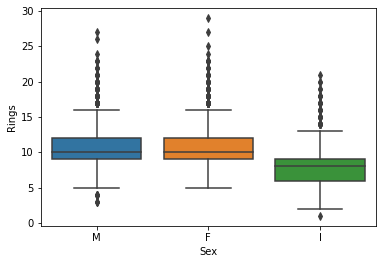

In [26]:
sns.boxplot(x='Sex',y='Rings',data=dataset)

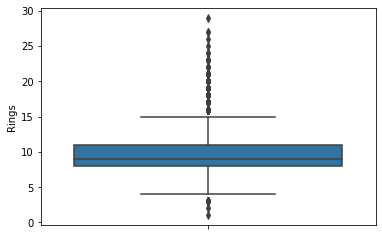

In [27]:
sns.boxplot(y='Rings',data=dataset)

In [28]:
dataset['Rings'].mean()

9.933684462532918

In [29]:
data1=dataset[dataset['Rings']<12]

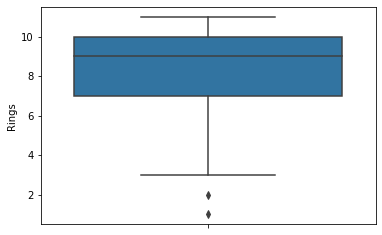

In [30]:
sns.boxplot(y='Rings',data=data1)

In [32]:
data_tips=pd.get_dummies(dataset)
data_tips

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


In [33]:
one_encde=OneHotEncoder(sparse=False)
encoded_arr=one_encde.fit_transform(dataset[['Length','Height','Sex','Diameter']])
encoded_arr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
x=dataset.iloc[:,1:4]
y=dataset.iloc[:,4]
x
y

0       0.5140
1       0.2255
2       0.6770
3       0.5160
4       0.2050
         ...  
4172    0.8870
4173    0.9660
4174    1.1760
4175    1.0945
4176    1.9485
Name: Whole weight, Length: 4177, dtype: float64

In [36]:
independent=dataset.iloc[1:,1:7].values

In [37]:
independent

array([[0.35  , 0.265 , 0.09  , 0.2255, 0.0995, 0.0485],
       [0.53  , 0.42  , 0.135 , 0.677 , 0.2565, 0.1415],
       [0.44  , 0.365 , 0.125 , 0.516 , 0.2155, 0.114 ],
       ...,
       [0.6   , 0.475 , 0.205 , 1.176 , 0.5255, 0.2875],
       [0.625 , 0.485 , 0.15  , 1.0945, 0.531 , 0.261 ],
       [0.71  , 0.555 , 0.195 , 1.9485, 0.9455, 0.3765]])

In [38]:
##Dependent variables

In [39]:
dependent=dataset.iloc[1:,9:].values
dependent

array([], shape=(4176, 0), dtype=float64)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.2,random_state=5)

In [42]:
x_train

array([[0.565 , 0.435 , 0.15  , 0.99  , 0.5795, 0.1825],
       [0.48  , 0.37  , 0.125 , 0.5435, 0.244 , 0.101 ],
       [0.44  , 0.35  , 0.12  , 0.375 , 0.1425, 0.0965],
       ...,
       [0.555 , 0.43  , 0.125 , 0.7005, 0.3395, 0.1355],
       [0.51  , 0.395 , 0.145 , 0.6185, 0.216 , 0.1385],
       [0.595 , 0.47  , 0.155 , 1.2015, 0.492 , 0.3865]])

In [43]:
x_test

array([[0.455 , 0.365 , 0.11  , 0.385 , 0.166 , 0.046 ],
       [0.47  , 0.37  , 0.18  , 0.51  , 0.1915, 0.1285],
       [0.72  , 0.575 , 0.17  , 1.9335, 0.913 , 0.389 ],
       ...,
       [0.275 , 0.215 , 0.075 , 0.1155, 0.0485, 0.029 ],
       [0.39  , 0.3   , 0.09  , 0.252 , 0.1065, 0.053 ],
       [0.585 , 0.46  , 0.165 , 1.1135, 0.5825, 0.2345]])

In [44]:
y_train

array([], shape=(3340, 0), dtype=float64)

In [45]:
y_test

array([], shape=(836, 0), dtype=float64)

In [47]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [48]:
iris=datasets.load_iris()

In [49]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [50]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [53]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [54]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [55]:
x=iris.data
y=iris.target

In [56]:
x.shape

(150, 4)

In [57]:
y.shape

(150,)

In [58]:
clf=RandomForestClassifier()

In [59]:
clf.fit(x,y)

RandomForestClassifier()

In [61]:
print(clf.feature_importances_)

[0.11145471 0.02264592 0.44997109 0.41592828]


In [62]:
x[0]

array([5.1, 3.5, 1.4, 0.2])

In [63]:
print(clf.predict([[5.1,3.5,1.4,0.2]]))

[0]


In [64]:
print(clf.predict(x[[0]]))

[0]


In [65]:
print(clf.predict_proba(x[[0]]))

[[1. 0. 0.]]


In [66]:
clf.fit(iris.data,iris.target_names[iris.target])

RandomForestClassifier()

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [70]:
x_train.shape,y_train.shape

((120, 4), (120,))

In [71]:
x_test.shape,y_test.shape

((30, 4), (30,))

In [72]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [73]:
print(clf.predict([[5.1,3.5,1.4,0.2]]))

[0]


In [75]:
print(clf.predict_proba([[5.1,3.5,1.4,0.2]]))

[[1. 0. 0.]]


In [76]:
print(clf.predict(x_test))

[1 2 2 1 2 2 1 0 0 2 2 2 2 2 2 2 0 1 1 2 0 2 0 1 0 2 2 0 2 2]


In [77]:
print(y_test)

[1 2 2 1 2 2 1 0 0 2 2 2 2 2 2 2 0 1 1 2 0 2 0 1 0 2 2 0 2 2]


In [78]:
print(clf.score(x_test,y_test))

1.0
